# Machine Learning Supervisado

A continuacion se presenta el plan para la ejecución del presente proyecto:

1. **Caracterización de los datos**
  * Verificación del tamaño y forma del DataFrame consolidado
  * Verificación de los tipos de dato.
  * Verificación de las unidades de medida de cada *feature*.
2. **Preparación de los datos**
  * Selección de características
3. **Modelamiento**
  * Bosques Aleatorios con gradient boosting - XGBoost
  * Las métricas con las cuales se evaluaran los modelos son:
    - mean_absolute_error
    - mean_square_error
    - r2_score
  * Enfoque Multivariable

4. **Evaluación**
  * Análisis de los resultados

## 1. Objetivo
El objetivo de la construcción de este modelo es predecir el precio de bolsa nacional con las variables de operación del sistema.

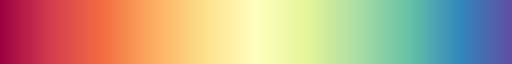

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import plotly
import plotly.graph_objects as go

# Configuraciones para las librerías y módulos usados.

# Ignoramos las advertencias o warnings.
import warnings
warnings.simplefilter(action='ignore')

# Configuramos el formato por defecto de la 
# librería de visualización Matplotlib.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 105
mpl.rcParams['figure.figsize'] = (9, 7)
sns.set_theme('notebook')
sns.color_palette("Spectral", as_cmap=True)

## 2. Caracterización de los Datos

In [109]:
df_power_co = pd.read_csv('./data/df_sistema_electrico_ML.csv')
df_power_co

,Date,generacion_sistema_daily,perdidas_sistema_daily,volumen_util_energia_sistema_daily,emisiones_sistema_daily,aportes_energia_sistema_daily,demanda_real_sistema_daily,exportaciones_sistema_daily,importaciones_sistema_daily,precio_bolsa_sistema_daily,comsumo_combustible_daily,disponibilidad_real_daily
0,2010-01-01,115.419084,2.079353,10006.614779,0.000000,45.6161,113.361581,4.53691,21.84964,120.501228,727.881567,12019.253333
1,2010-01-02,127.681195,2.226467,9995.146812,0.000000,43.0971,125.471807,12.55138,17.07939,118.495340,743.929011,11987.024167
2,2010-01-03,123.637778,2.509638,9992.677303,0.000000,43.4004,121.145173,9.11835,17.03269,121.160145,749.063827,11995.728333
3,2010-01-04,145.957459,2.032915,9965.341214,0.000000,40.4104,143.931719,1513.37010,7.17460,123.962937,772.736247,11586.104167
4,2010-01-05,152.148029,2.278902,9926.759570,0.000000,41.1906,149.869128,3057.65195,0.00000,120.666437,767.491641,11652.071667
...,...,...,...,...,...,...,...,...,...,...,...,...
5229,2024-04-26,224.604764,3.468542,5399.083900,81.390038,175.1971,221.136223,0.00000,0.00000,215.201028,1077.648732,14922.365750
5230,2024-04-27,217.165537,3.317766,5454.064900,72.221148,190.9257,213.847772,0.00000,0.00000,160.221522,959.209242,14650.352500
5231,2024-04-28,194.188787,2.880163,5557.993200,65.899834,206.1877,191.312939,12.43822,4.31501,106.818940,864.909070,15266.665000
5232,2024-04-29,222.354541,2.869375,5672.509900,50.743738,303.2062,219.497829,41.64696,12.66244,136.110230,646.768820,15291.233750


In [110]:
df_power_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                5234 non-null   object 
 1   generacion_sistema_daily            5234 non-null   float64
 2   perdidas_sistema_daily              5234 non-null   float64
 3   volumen_util_energia_sistema_daily  5234 non-null   float64
 4   emisiones_sistema_daily             5234 non-null   float64
 5   aportes_energia_sistema_daily       5234 non-null   float64
 6   demanda_real_sistema_daily          5234 non-null   float64
 7   exportaciones_sistema_daily         5234 non-null   float64
 8   importaciones_sistema_daily         5234 non-null   float64
 9   precio_bolsa_sistema_daily          5234 non-null   float64
 10  comsumo_combustible_daily           5234 non-null   float64
 11  disponibilidad_real_daily           5234 no

In [111]:
df_power_co.describe()

,generacion_sistema_daily,perdidas_sistema_daily,volumen_util_energia_sistema_daily,emisiones_sistema_daily,aportes_energia_sistema_daily,demanda_real_sistema_daily,exportaciones_sistema_daily,importaciones_sistema_daily,precio_bolsa_sistema_daily,comsumo_combustible_daily,disponibilidad_real_daily
count,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000
mean,185.062136,2.800156,10866.323553,14.180502,162.732899,183.253813,1731.938017,991.816631,225.569533,381.504848,12891.569094
std,22.842767,0.568683,2412.985776,18.506221,79.487528,22.869576,2978.019699,2152.138271,205.734350,172.910657,1201.738775
min,115.419084,-2.118570,4958.518300,0.000000,29.032100,113.361581,0.000000,0.000000,35.356673,113.521375,8850.326083
25%,168.157388,2.432048,9258.527770,0.000000,104.724325,166.184080,4.538617,0.865135,106.351090,249.152440,11991.579583
50%,184.299340,2.753888,11088.633250,0.000000,149.289550,182.850101,39.605140,11.467630,158.982260,340.935961,12975.459625
75%,199.077388,3.118325,12777.188541,24.442364,205.474700,198.366957,2418.663413,374.573627,247.326889,476.947453,13803.071729
max,250.439131,7.079952,15649.798000,83.577438,591.245300,246.937412,35052.391050,10911.030180,1942.692797,1104.847110,16699.097167


### Ventana de Tiempo

In [112]:
#Fecha inicial del dataset
df_power_co['Date'].head(1)

0    2010-01-01
Name: Date, dtype: object

In [113]:
#Fecha final del dataset
df_power_co['Date'].tail(1)

5233    2024-04-30
Name: Date, dtype: object

## 3. Preparacion de los datos

Del Analisis Exploratorio de Datos podemos se seleccionaron las siguientes variables como valiosas para entrenar modelos de ML.

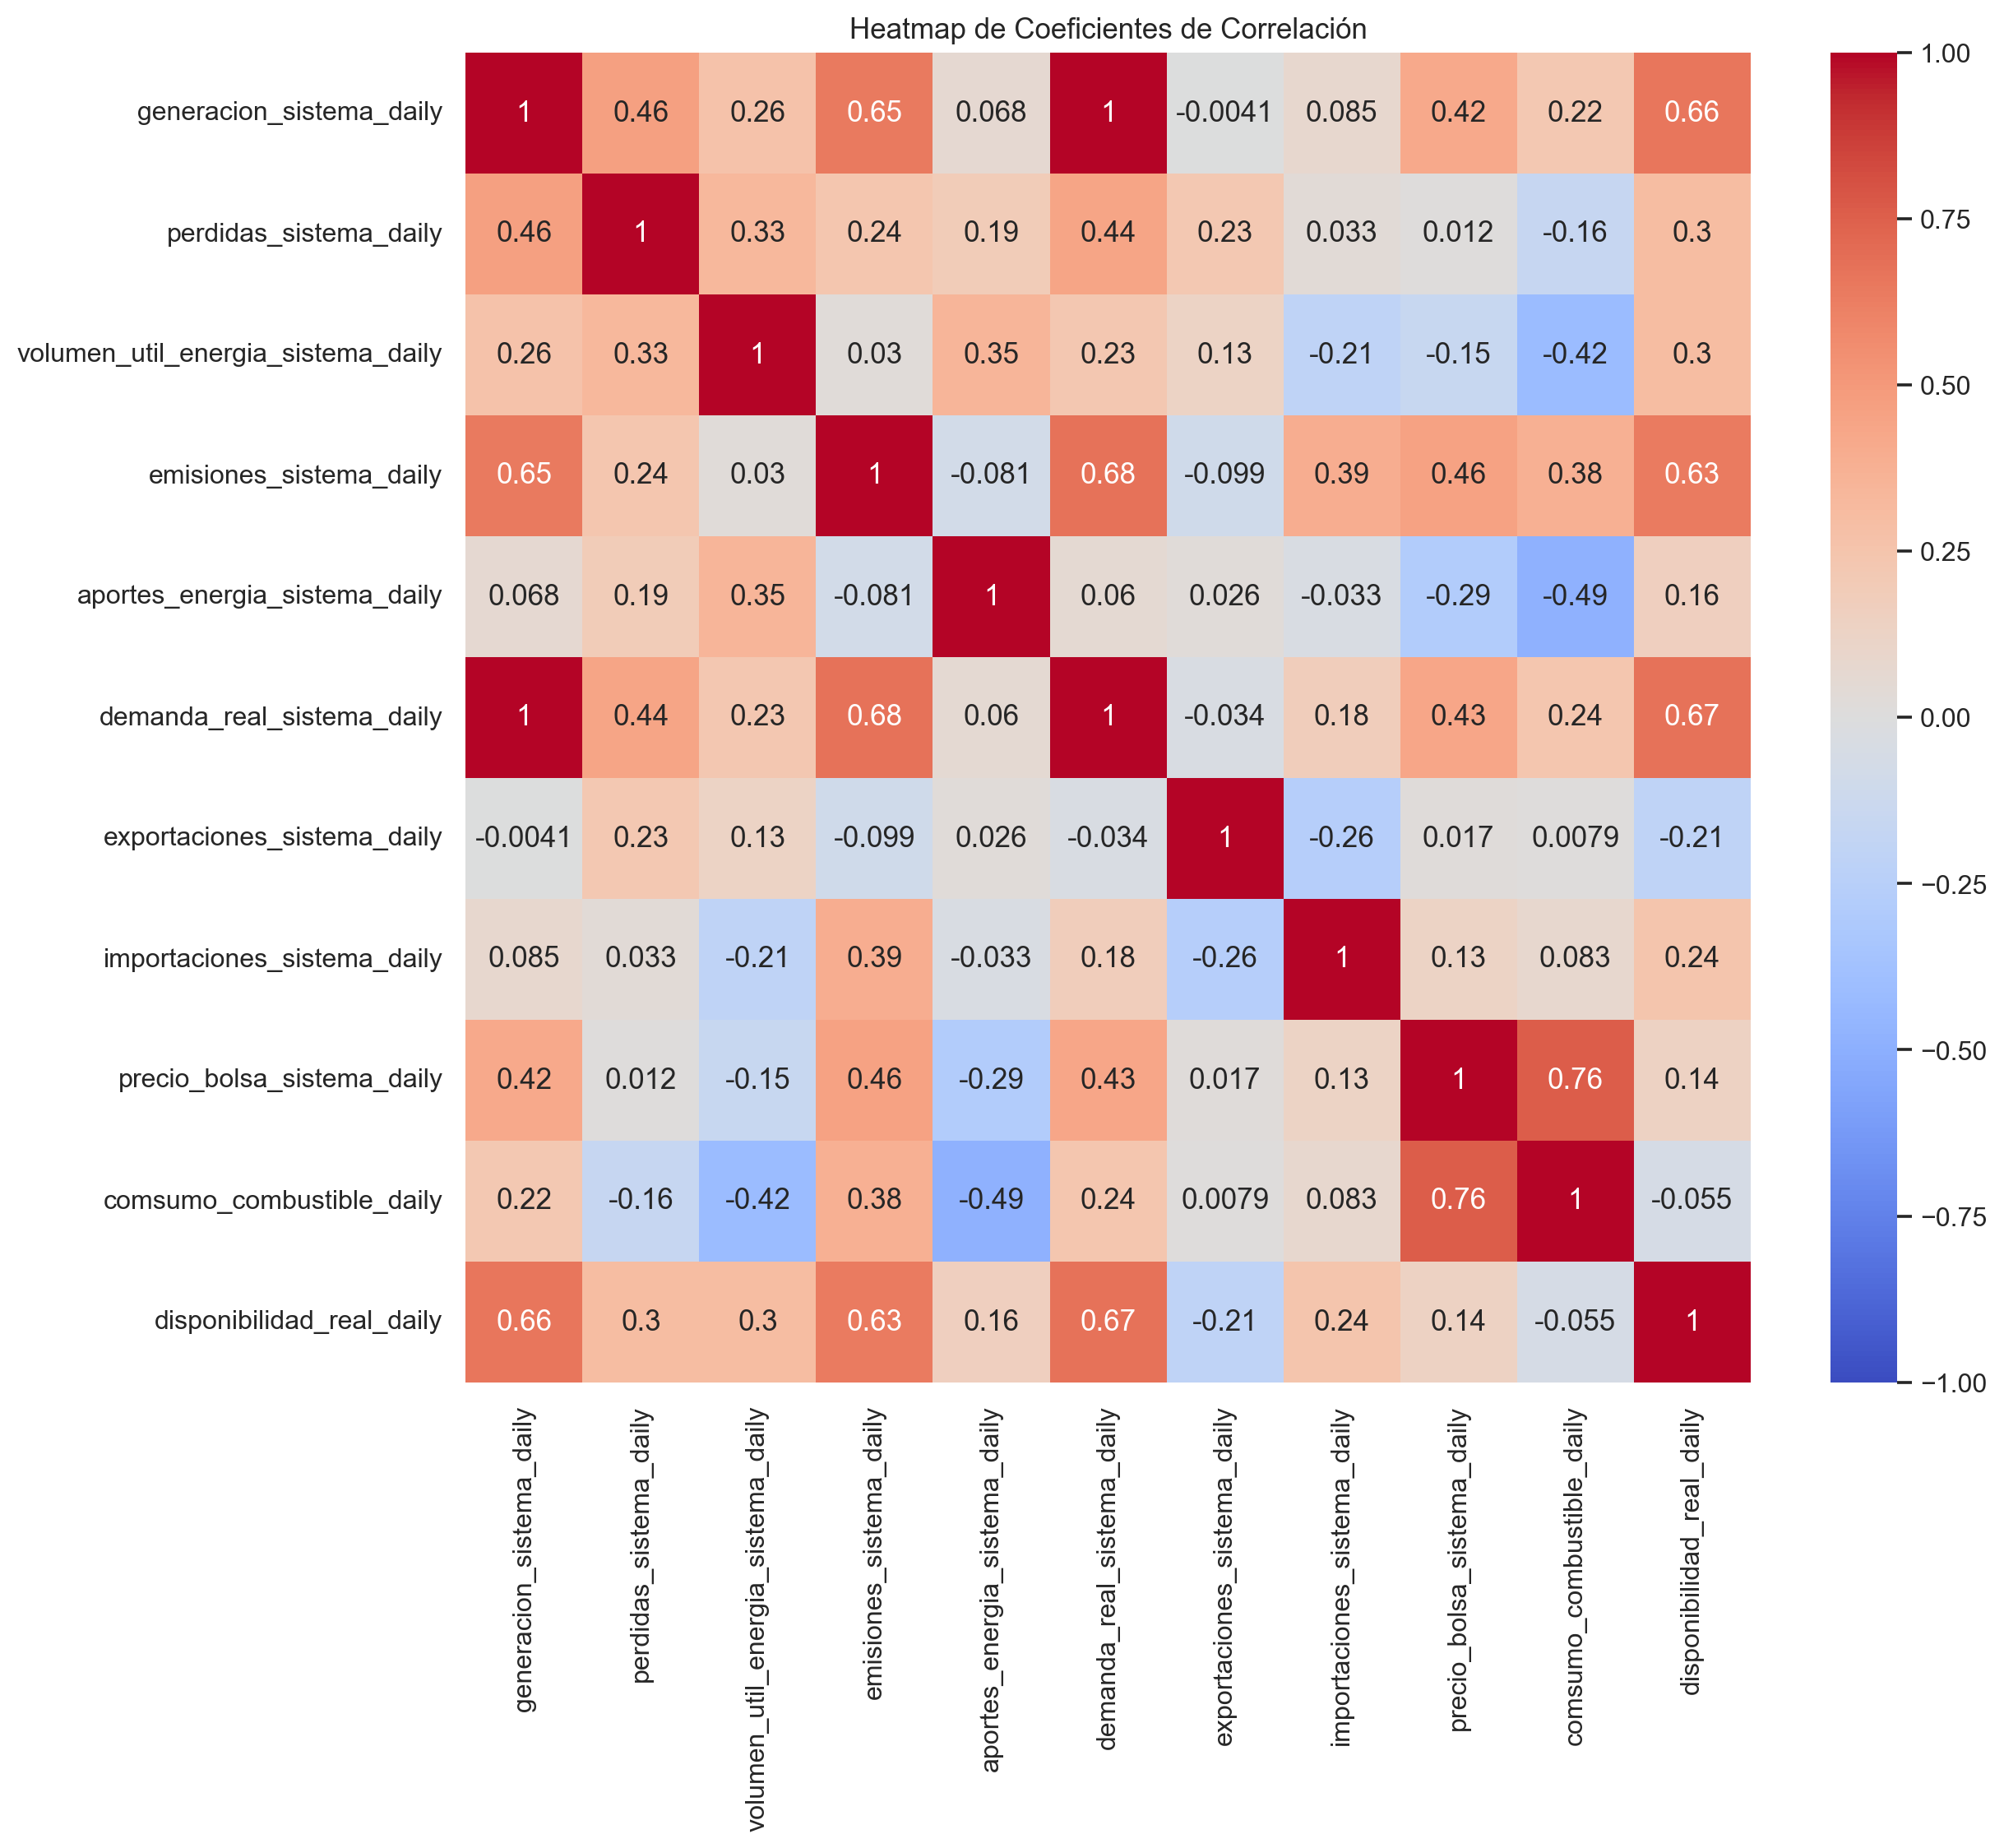

In [114]:
df_power_co = df_power_co.set_index('Date')
corr_matrix = df_power_co.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Heatmap de Coeficientes de Correlación')
plt.show()

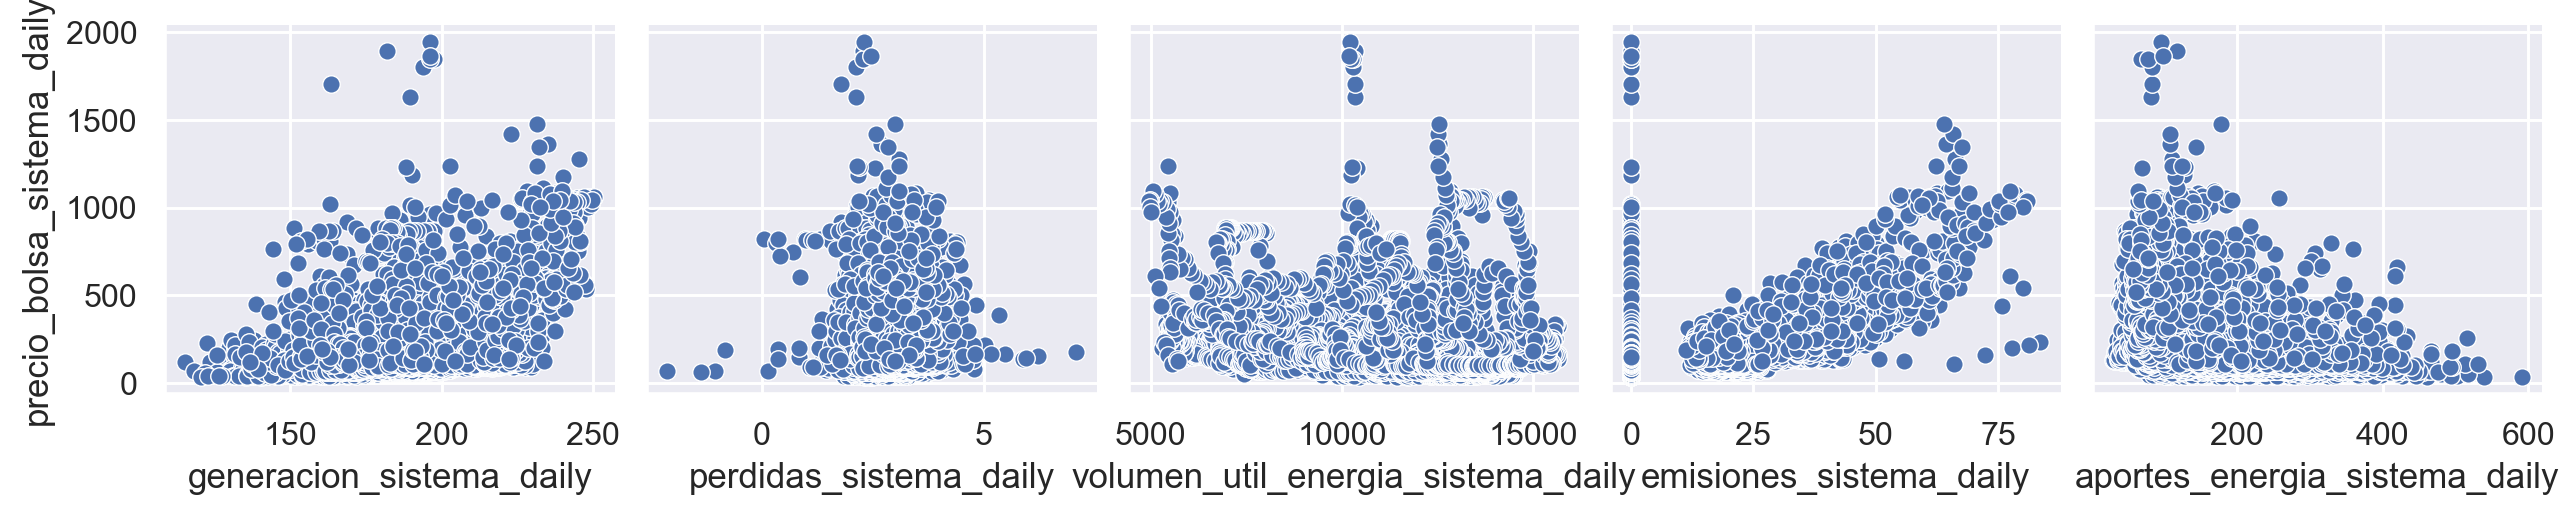

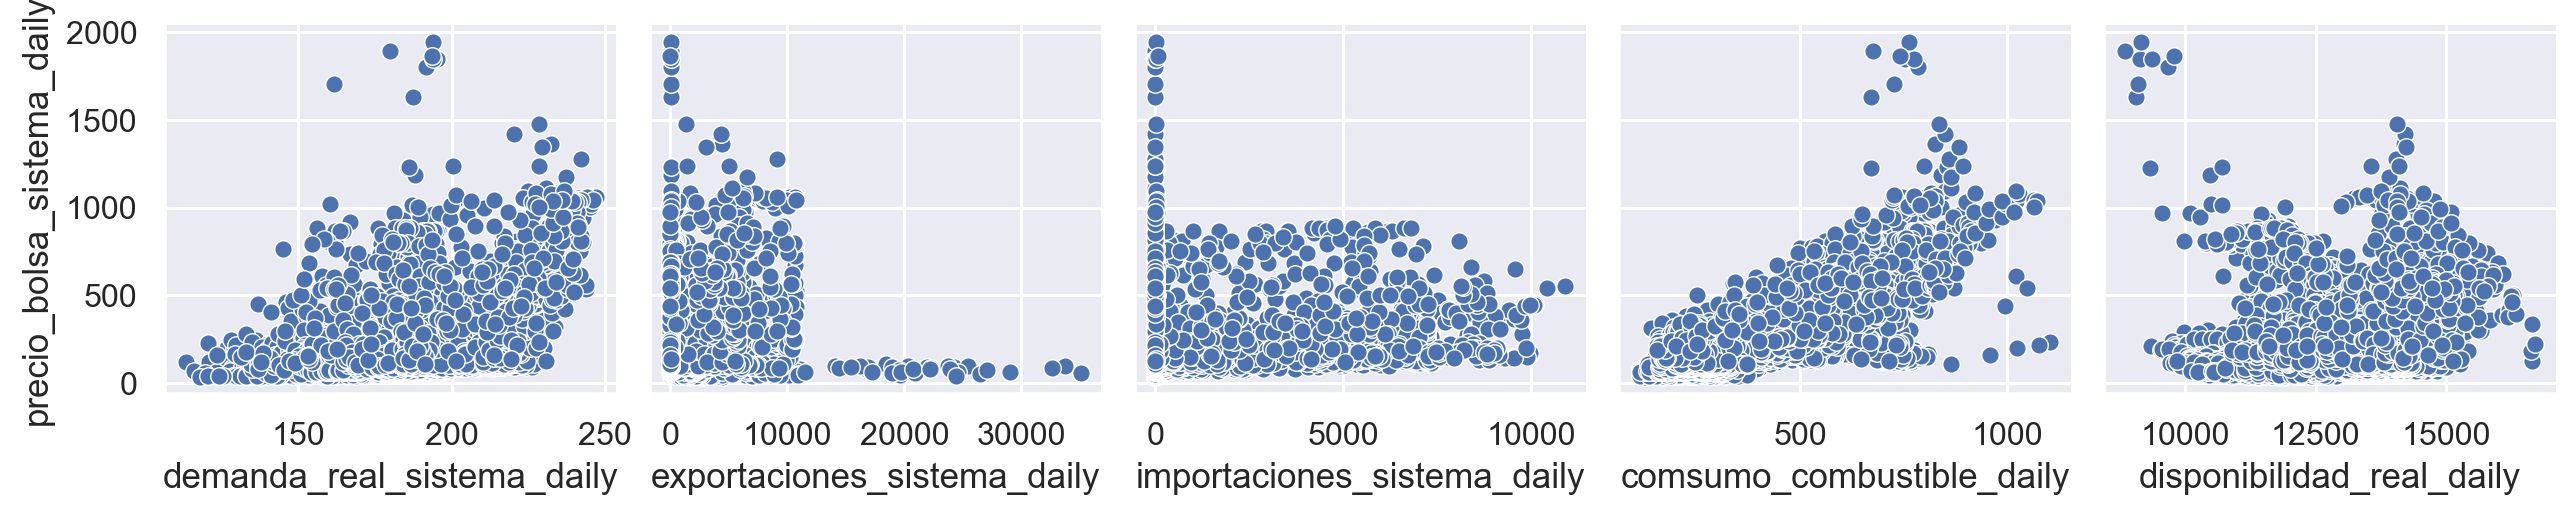

In [115]:
y_vars = ['precio_bolsa_sistema_daily']

x_vars = ['generacion_sistema_daily', 

          'perdidas_sistema_daily',
          'volumen_util_energia_sistema_daily',
          'emisiones_sistema_daily',
          'aportes_energia_sistema_daily']

sns.pairplot(df_power_co, y_vars=y_vars, x_vars=x_vars)
x_vars = [

          'demanda_real_sistema_daily',
          'exportaciones_sistema_daily',
          'importaciones_sistema_daily',
          'comsumo_combustible_daily',
          'disponibilidad_real_daily']
sns.pairplot(df_power_co, y_vars=y_vars, x_vars=x_vars)

In [116]:
df_power_co = df_power_co.drop("emisiones_sistema_daily", axis=1)

### Escalamiento de los datos en X

<Axes: xlabel='Date'>

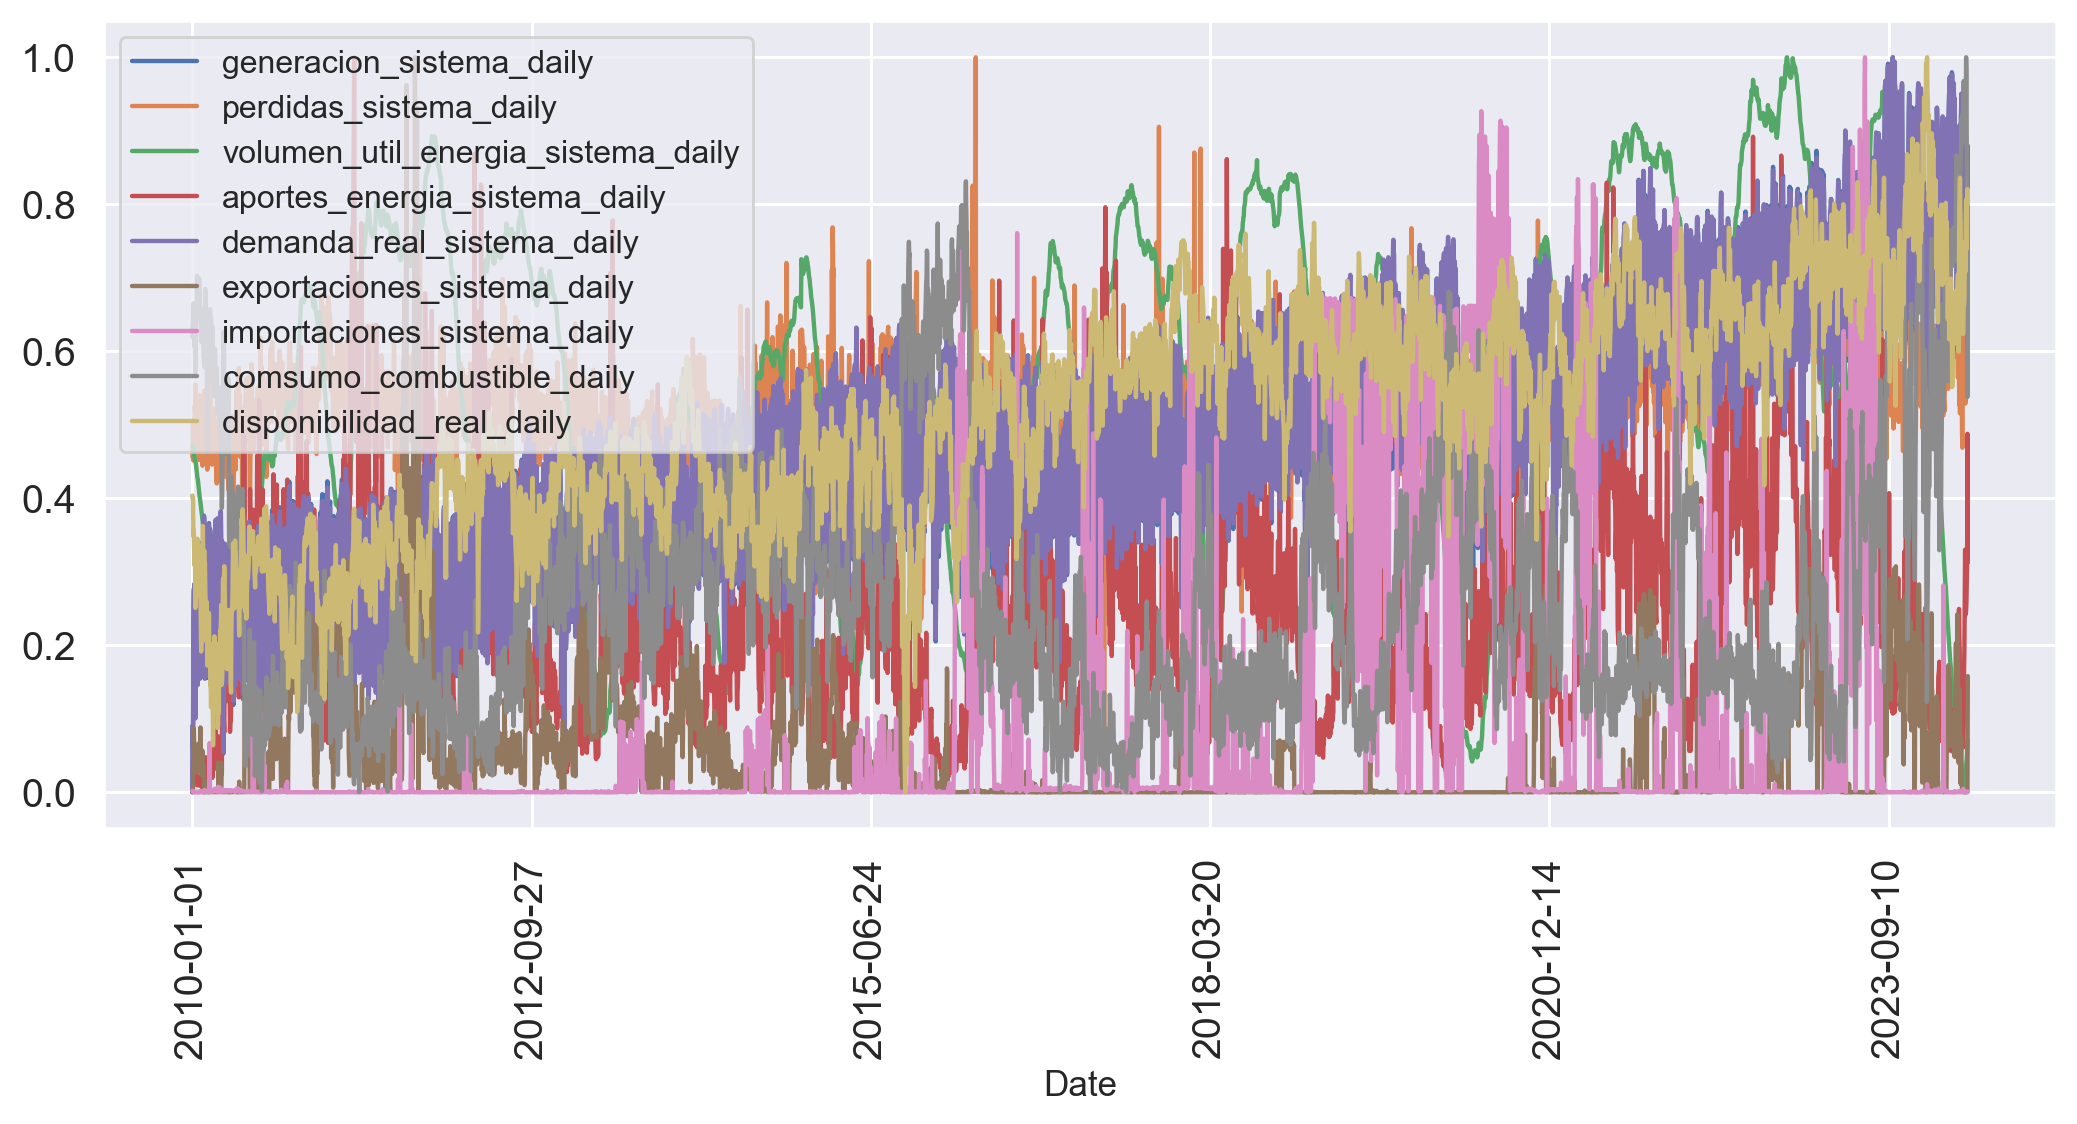

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler_multi = MinMaxScaler()

for column in df_power_co.columns:
  if column!="precio_bolsa_sistema_daily":
    df_power_co[column] = scaler_multi.fit_transform(df_ts_multivar[column].values.reshape(-1, 1))

df_power_co.drop('precio_bolsa_sistema_daily', axis=1).plot(rot=90, figsize = (12, 5), fontsize = 13.5)

### Partición de entrenamiento y prueba

In [118]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score


# Separar características y variable objetivo
X = df_power_co.drop('precio_bolsa_sistema_daily', axis=1)
y = df_power_co['precio_bolsa_sistema_daily']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Entrenamiento del Modelo

In [119]:
# Definir el modelo
xgb = XGBRegressor(objective='reg:squarederror')

# Definir los parámetros para GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Definir el K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Definir GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold, verbose=1, n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Mejores hiperparámetros: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.7}


## Metricas del Modelo

In [120]:
# Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R^2:", r2)

Mean Squared Error: 3383.7448159428463
Root Mean Squared Error: 58.16996489549264
R^2: 0.9215762458969964


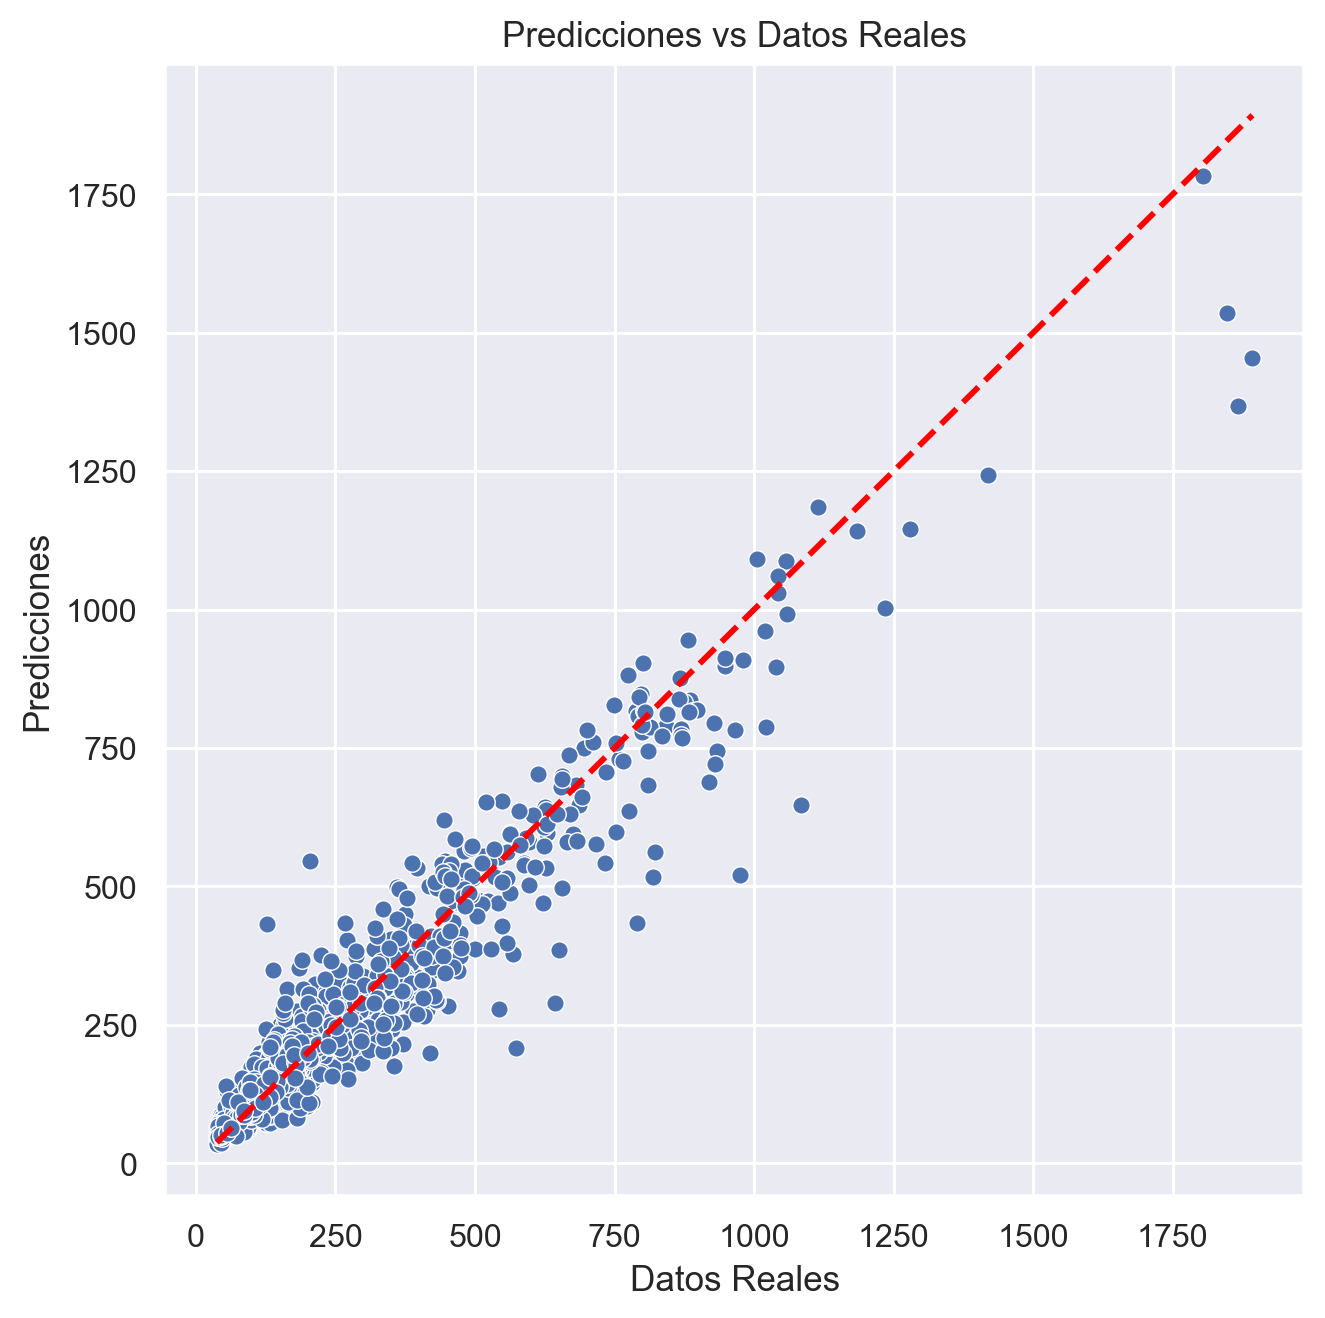

In [121]:
# Graficar Predicciones vs Datos Reales en un Diagrama de Dispersión
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Predicciones vs Datos Reales')
plt.xlabel('Datos Reales')
plt.ylabel('Predicciones')
plt.show()

Las metricas del modelo:

In [122]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R^2:", r2)

Mean Squared Error: 3383.7448159428463
Root Mean Squared Error: 58.16996489549264
R^2: 0.9215762458969964


Indican que se construyo un buen modelo de machine Learning.